Fazendo o histograma da Imagem em escala de cinza

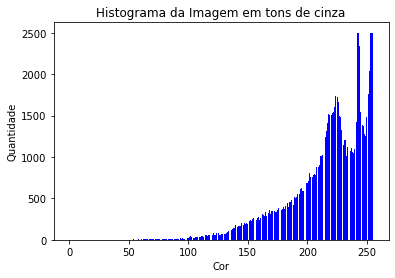

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Carregando a imagem
path = 'lowcontrast.jpg'
img = cv2.imread(path)

img_height = img.shape[0]
img_width = img.shape[1]

#Transformando em escala de cinza
gray = np.zeros(img.shape[:2], dtype = 'uint8')

for i in range(img_height):
    for j in range(img_width):
        gray[i][j] = sum(img[i][j])//3
        
cv2.imshow('Gray', gray)
cv2.waitKey()

#Fazendo o histograma da imagem
hist = [0] * 256

for i in range(img_height):
    for j in range(img_width):
        px = gray[i][j]
        if hist[px] < 2500:
            hist[px] += 1 

pixel = 256*[0]
for i in range(256):
    pixel[i] = i

plt.xlabel('Cor')
plt.ylabel('Quantidade')
plt.title('Histograma da Imagem em tons de cinza')

plt.bar(pixel, hist, color = 'blue')
plt.show()

Fazendo a curva de tom

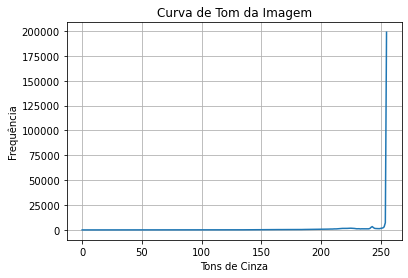

In [3]:
plt.plot(hist)
plt.title('Curva de Tom da Imagem')
plt.xlabel('Tons de Cinza')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Expandindo o histograma

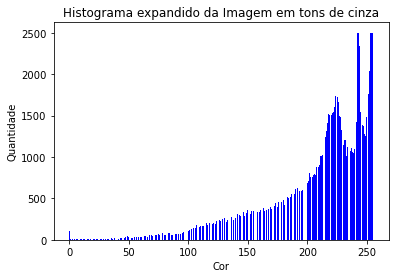

-1

In [30]:
#Calculando intensidade
r1 = 70
r2 = 200
s1 = 0
s2 = 200
rmax = 255
smax = 255

copia = np.copy(gray)

for i in range(img_height):
    for j in range(img_width):
            r = copia[i][j]
            if r < r1:
                s = (s1/r1) * r
            elif r >= r1 and r <= r2:
                s = (((r-r1)*(s2-s1))/(r2-r1)) + s1
            elif r > r2:
                s = (r-r2)*((smax-s2)/(rmax-r2)) + s2
                
            copia[i, j] = s

#Fazendo o histograma da imagem
expanded_hist = [0] * 256

for i in range(img_height):
    for j in range(img_width):
        px = copia[i][j]
        if expanded_hist[px] < 2500:
            expanded_hist[px] += 1

pixel = 256*[0]
for i in range(256):
    pixel[i] = i

plt.xlabel('Cor')
plt.ylabel('Quantidade')
plt.title('Histograma expandido da Imagem em tons de cinza')
plt.bar(pixel, expanded_hist, color = 'blue')
plt.show()

cv2.imshow('Imagem original', gray)
cv2.imshow('Imagem expandida', copia)
cv2.waitKey()

In [35]:
#Expansão simplificada
r1 = np.min(gray)
r2 = np.max(gray)

copia = np.copy(gray)

for i in range(img_height):
    for j in range(img_width):
            r = copia[i][j]
            if r >= r1 and r <= r2:
                s = 255 * ((r - r1) / (r2 - r1))
            elif r <= r1:
                s = 0
            elif r >= r2:
                s = 255
            copia[i, j] = s
cv2.imshow('Imagem original', gray)
cv2.imshow('Imagem expandida', copia)
cv2.waitKey()

-1

Comprimindo o histograma

In [36]:
minShade = np.min(copia)
maxShade = np.max(copia)
min = 0
max = 255

compressed_img = ((max - min)*(copia - minShade) + (maxShade*min))/maxShade

cv2.imshow('Imagem comprimida', compressed_img)
cv2.waitKey()

#Fazendo o histograma da imagem
expanded_hist = [0] * 256

for i in range(img_height):
    for j in range(img_width):
        px = copia[i][j]
        if expanded_hist[px] < 2500:
            expanded_hist[px] += 1

pixel = 256*[0]
for i in range(256):
    pixel[i] = i

plt.xlabel('Cor')
plt.ylabel('Quantidade')
plt.title('Histograma expandido da Imagem em tons de cinza')
plt.bar(pixel, expanded_hist, color = 'blue')
plt.show()

-1